In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
train_x = pd.read_csv('clustering_train_x.csv')

In [12]:
from sklearn.preprocessing import OneHotEncoder, normalize

# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(train_x[['f6']]).toarray())
# merge with main df bridge_df on key values
train_x = train_x.join(enc_df)
train_x = train_x.drop('f6', axis = 1)

In [13]:
train_x_norm = normalize(train_x, norm='l2')

In [14]:
km = KMeans(n_clusters=5)
km.fit(train_x_norm)
print(km.labels_[:10])

[2 0 2 2 2 4 0 3 3 2]


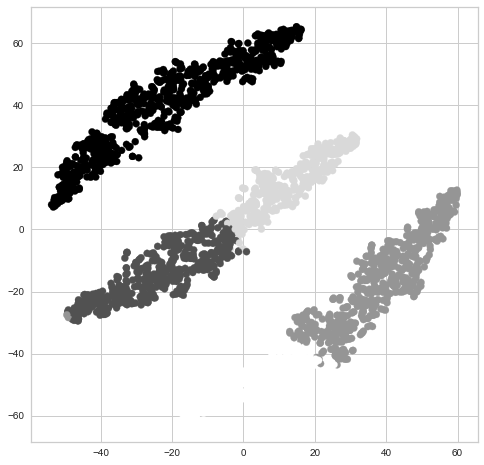

In [15]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tnse_data = model.fit_transform(train_x_norm)
plt.figure(figsize=(8,8))
plt.scatter(tnse_data[:,0], tnse_data[:,1], c=km.labels_)
plt.show()

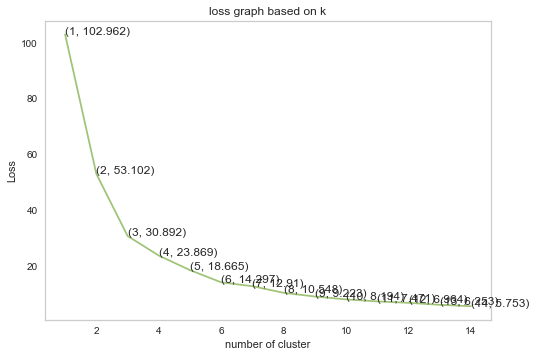

In [16]:
k = [x for x in range(1, 15)]
center_array, loss_array = [], []

df = pd.DataFrame(train_x_norm)
for x in k:
    km = KMeans(n_clusters=x)
    km.fit(train_x_norm)
    loss_array.append(km.inertia_)
fig, ax = plt.subplots()
ax.plot(k, loss_array,c='g')
for i, txt in enumerate(np.round(loss_array,3)):
    ax.annotate((k[i],np.round(txt,3)), (k[i],loss_array[i]))
plt.grid()
plt.title("loss graph based on k")
plt.xlabel("number of cluster")
plt.ylabel("Loss")
plt.show()

In [17]:
km = KMeans(n_clusters=5)
km.fit(train_x_norm)
print(km.labels_[:10])


[1 0 1 1 1 3 0 4 4 1]


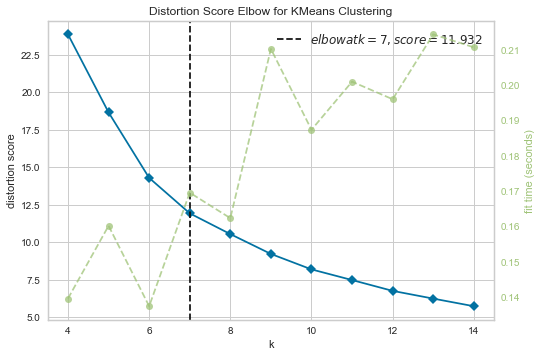

In [18]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15), locate_elbow=True)

visualizer.fit(train_x_norm)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [19]:
km = KMeans(n_clusters=7)
km.fit(train_x_norm)
print(km.labels_[:10])

[5 1 5 5 5 6 1 0 0 5]


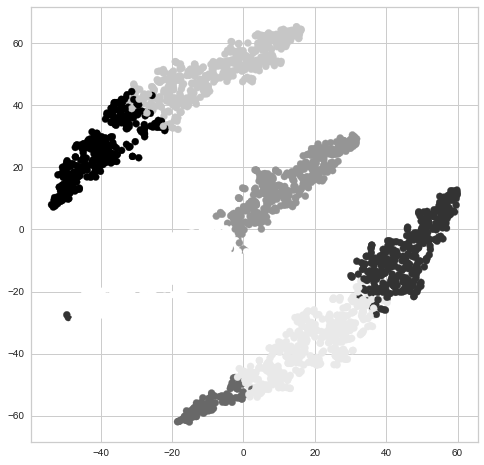

In [20]:
model = TSNE(n_components=2, random_state=0, perplexity=30)
tnse_data = model.fit_transform(train_x_norm)
plt.figure(figsize=(8,8))
plt.scatter(tnse_data[:,0], tnse_data[:,1], c=km.labels_)
plt.show()
